In [1]:
import pandas as pd
import joblib
import os
from sklearn.model_selection import train_test_split    
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score



In [2]:
Dataset_path = "D:/PROJECTS/Clinical_Case_Diagnosis_Assistant - Copy/dataset/Final_Augmented_dataset_Diseases_and_Symptoms.csv"

In [3]:
df = pd.read_csv(Dataset_path)

df.head()

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246945 entries, 0 to 246944
Columns: 378 entries, diseases to neck weakness
dtypes: int64(377), object(1)
memory usage: 712.2+ MB


In [5]:
df.shape

(246945, 378)

In [6]:
df.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [7]:
df[df.isnull().any(axis=1)]

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness


In [8]:
X = df.drop('diseases', axis=1)
X

,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,palpitations,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246942,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246943,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
y = df['diseases']
y

0                 panic disorder
1                 panic disorder
2                 panic disorder
3                 panic disorder
4                 panic disorder
                   ...          
246940    open wound of the nose
246941    open wound of the nose
246942    open wound of the nose
246943    open wound of the nose
246944    open wound of the nose
Name: diseases, Length: 246945, dtype: object

In [10]:
y.nunique()

773

In [11]:
y.unique()

array(['panic disorder', 'vocal cord polyp', 'turner syndrome',
       'cryptorchidism', 'poisoning due to ethylene glycol',
       'atrophic vaginitis', 'fracture of the hand',
       'cellulitis or abscess of mouth', 'eye alignment disorder',
       'headache after lumbar puncture', 'pyloric stenosis',
       'salivary gland disorder', 'osteochondrosis', 'injury to the knee',
       'metabolic disorder', 'vaginitis', 'sick sinus syndrome',
       'tinnitus of unknown cause', 'glaucoma', 'eating disorder',
       'transient ischemic attack', 'pyelonephritis',
       'rotator cuff injury', 'chronic pain disorder',
       'problem during pregnancy', 'liver cancer', 'atelectasis',
       'injury to the hand', 'choledocholithiasis', 'injury to the hip',
       'cirrhosis', 'thoracic aortic aneurysm', 'subdural hemorrhage',
       'diabetic retinopathy', 'fibromyalgia', 'ischemia of the bowel',
       'fetal alcohol syndrome', 'peritonitis', 'injury to the abdomen',
       'acute pancreati

In [12]:
type(X)

pandas.core.frame.DataFrame

In [13]:
X.shape

(246945, 377)

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246945 entries, 0 to 246944
Columns: 377 entries, anxiety and nervousness to neck weakness
dtypes: int64(377)
memory usage: 710.3 MB


In [15]:
X.select_dtypes(include='int64').columns

Index(['anxiety and nervousness', 'depression', 'shortness of breath',
       'depressive or psychotic symptoms', 'sharp chest pain', 'dizziness',
       'insomnia', 'abnormal involuntary movements', 'chest tightness',
       'palpitations',
       ...
       'stuttering or stammering', 'problems with orgasm', 'nose deformity',
       'lump over jaw', 'sore in nose', 'hip weakness', 'back swelling',
       'ankle stiffness or tightness', 'ankle weakness', 'neck weakness'],
      dtype='object', length=377)

In [16]:
X = X.astype({col: 'int32' for col in X.select_dtypes(include='int64').columns})
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246945 entries, 0 to 246944
Columns: 377 entries, anxiety and nervousness to neck weakness
dtypes: int32(377)
memory usage: 355.1 MB


In [17]:
type(y)

pandas.core.series.Series

In [18]:
y.shape

(246945,)

In [19]:
y.value_counts()

diseases
cystitis                          1219
nose disorder                     1218
vulvodynia                        1218
complex regional pain syndrome    1217
spondylosis                       1216
                                  ... 
open wound of the head               1
myocarditis                          1
chronic ulcer                        1
hypergammaglobulinemia               1
kaposi sarcoma                       1
Name: count, Length: 773, dtype: int64

In [20]:
classes_with_onesample = y.value_counts()[y.value_counts() <= 1].index
classes_with_onesample.tolist()

['turner syndrome',
 'rocky mountain spotted fever',
 'open wound of the cheek',
 'high blood pressure',
 'open wound due to trauma',
 'open wound of the chest',
 'huntington disease',
 'open wound of the knee',
 'foreign body in the nose',
 'diabetes',
 'thalassemia',
 'heat stroke',
 'gas gangrene',
 'typhoid fever',
 'open wound of the head',
 'myocarditis',
 'chronic ulcer',
 'hypergammaglobulinemia',
 'kaposi sarcoma']

In [21]:
len(classes_with_onesample.tolist())

19

In [22]:
# If you want it as a DataFrame (for merging or plotting)

class_counts = df['diseases'].value_counts().reset_index()
class_counts.columns = ['class_name', 'count']

class_counts

,class_name,count
0,cystitis,1219
1,nose disorder,1218
2,vulvodynia,1218
3,complex regional pain syndrome,1217
4,spondylosis,1216
...,...,...
768,open wound of the head,1
769,myocarditis,1
770,chronic ulcer,1
771,hypergammaglobulinemia,1


In [23]:
df['diseases'].nunique()

773

Split the Dataset into Train and Test

In [24]:
# stratify=y : To make sure the train/test sets have the same disease distribution, especially important when there are many classes.
# removed stratification as there are many classes with one sample as it need atlease 2 samples per class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (197556, 377) (197556,)
Test set shape: (49389, 377) (49389,)


In [27]:
# Check your current memory usage

import psutil
print(psutil.virtual_memory())

svmem(total=8419069952, available=663392256, percent=92.1, used=7755677696, free=663392256)


In [26]:
model = RandomForestClassifier(n_estimators=5, random_state=42)
model.fit(X_train, y_train)

,n_estimators,5
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
import sys
print(sys.getsizeof(model))  # gives rough size in bytes

48


In [30]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
y_pred = model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy score: 0.8214784668650914


d:\PROJECTS\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\PROJECTS\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\PROJECTS\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\PROJECTS\.venv\Lib\site-packages\sklearn\metrics\_clas

Classification report:
                                                           precision    recall  f1-score   support

                               abdominal aortic aneurysm       0.91      1.00      0.95        20
                                        abdominal hernia       0.89      0.96      0.92        81
                                         abscess of nose       0.74      0.88      0.80        58
                                     abscess of the lung       1.00      1.00      1.00         6
                                  abscess of the pharynx       0.90      0.89      0.90        63
                                    acanthosis nigricans       0.83      0.83      0.83         6
                                               acariasis       1.00      1.00      1.00         5
                                               achalasia       0.63      0.95      0.76        20
                                                    acne       0.69      0.69      0.69      

In [31]:
confusion_matrix(y_test, y_pred)

array([[ 20,   0,   0, ...,   0,   0,   0],
       [  0,  78,   0, ...,   0,   0,   0],
       [  0,   0,  51, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   1,   0,   0],
       [  0,   0,   0, ...,   0, 102,   0],
       [  0,   0,   0, ...,   0,   0,   2]], shape=(736, 736))

In [32]:
model.classes_

array(['abdominal aortic aneurysm', 'abdominal hernia', 'abscess of nose',
       'abscess of the lung', 'abscess of the pharynx',
       'acanthosis nigricans', 'acariasis', 'achalasia', 'acne',
       'actinic keratosis', 'acute bronchiolitis', 'acute bronchitis',
       'acute bronchospasm', 'acute fatty liver of pregnancy (aflp)',
       'acute glaucoma', 'acute kidney injury', 'acute otitis media',
       'acute pancreatitis', 'acute respiratory distress syndrome (ards)',
       'acute sinusitis', 'acute stress reaction',
       'adhesive capsulitis of the shoulder', 'adjustment reaction',
       'adrenal adenoma', 'adrenal cancer', 'alcohol abuse',
       'alcohol intoxication', 'alcohol withdrawal',
       'alcoholic liver disease', 'allergy', 'allergy to animals',
       'alopecia', 'alzheimer disease', 'amblyopia', 'amyloidosis',
       'amyotrophic lateral sclerosis (als)', 'anal fissure',
       'anal fistula', 'anemia', 'anemia due to chronic kidney disease',
       'anemia

In [33]:
len(model.classes_)

766

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred, labels= model.classes_)

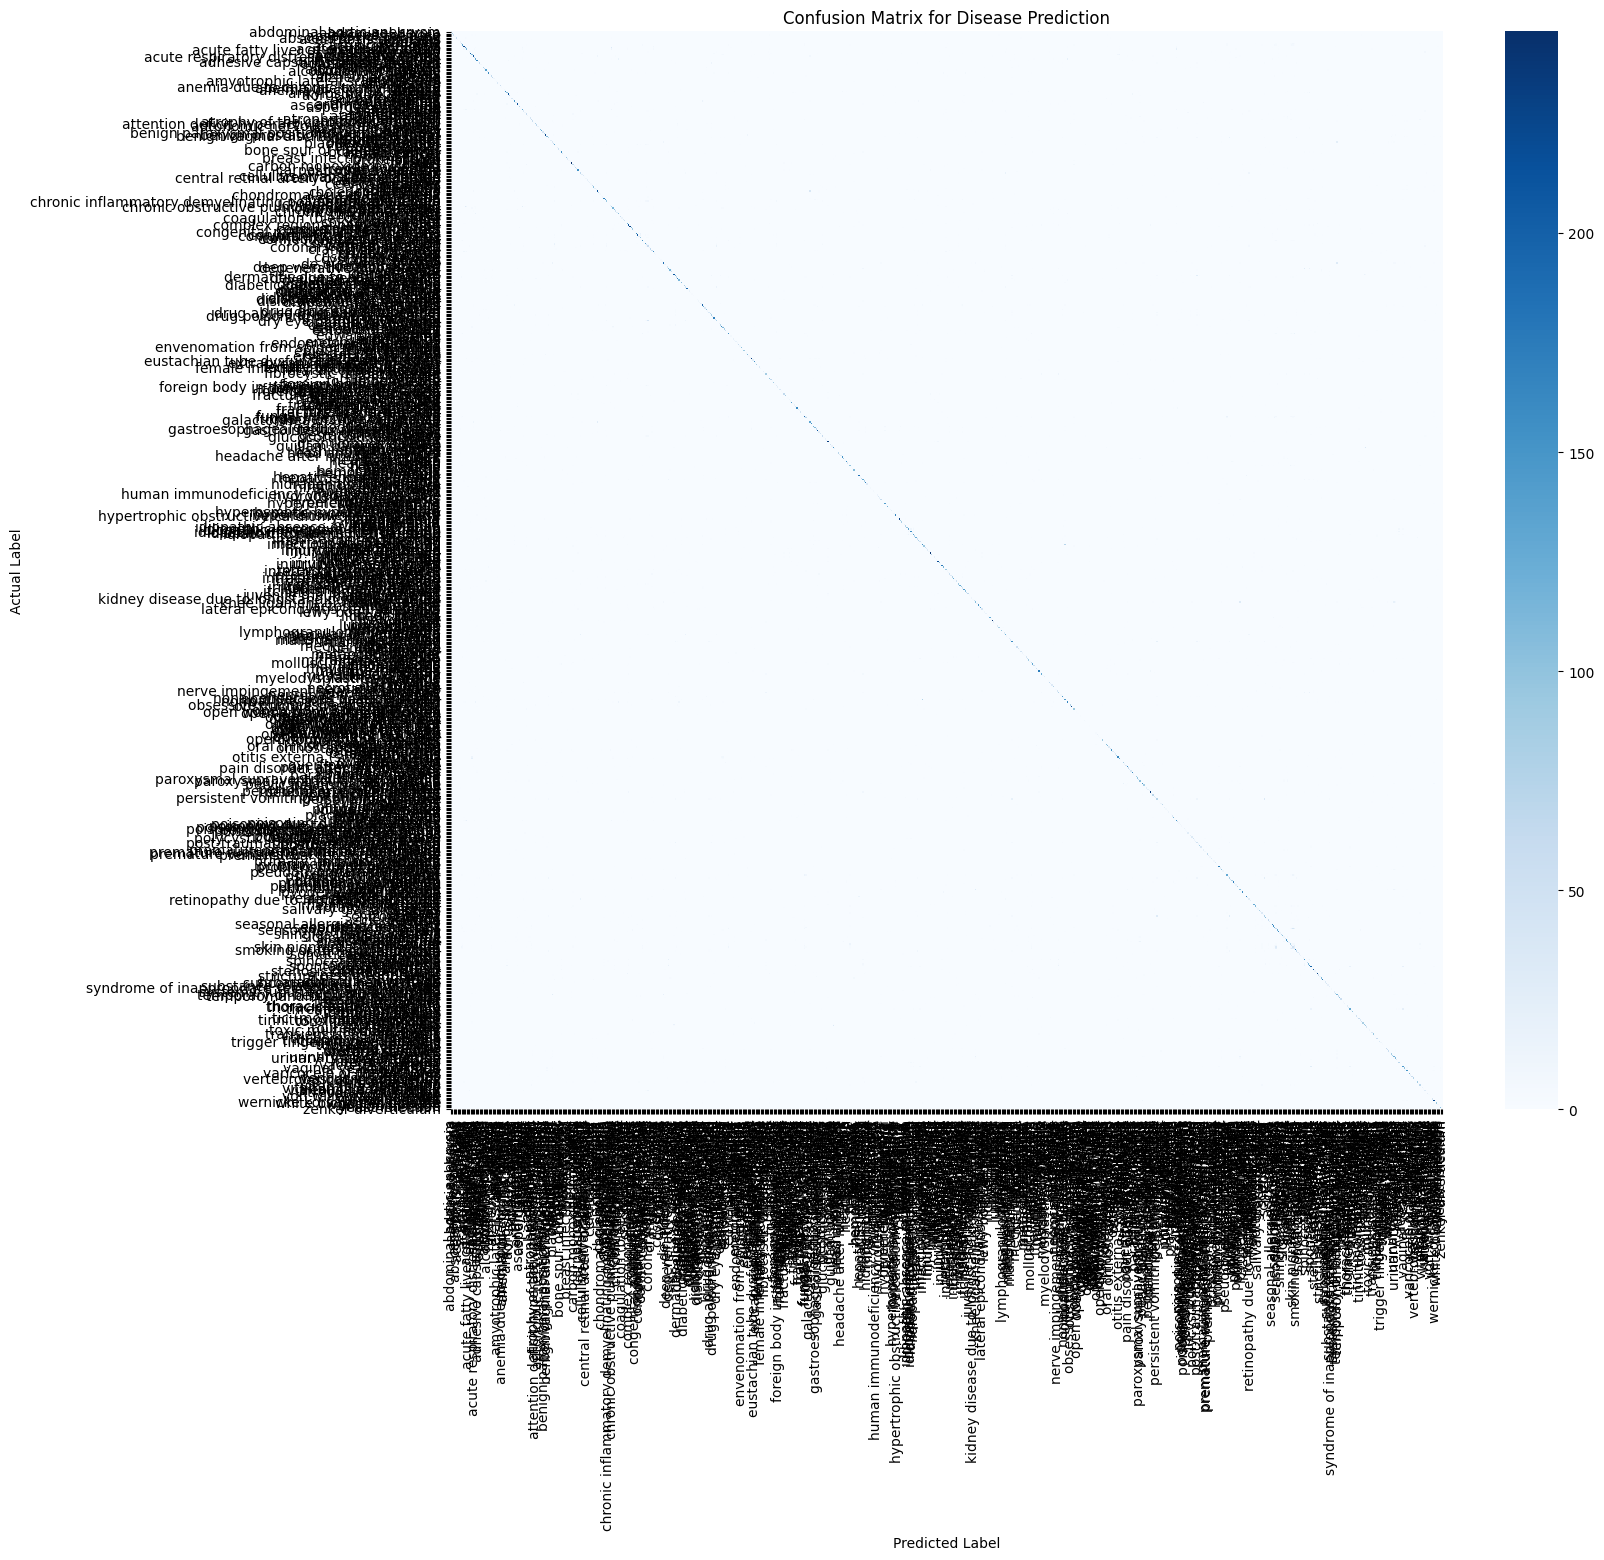

In [35]:
plt.figure(figsize=(16, 14))

sns.heatmap(cm, annot=False, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap='Blues')

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Disease Prediction')
plt.show()

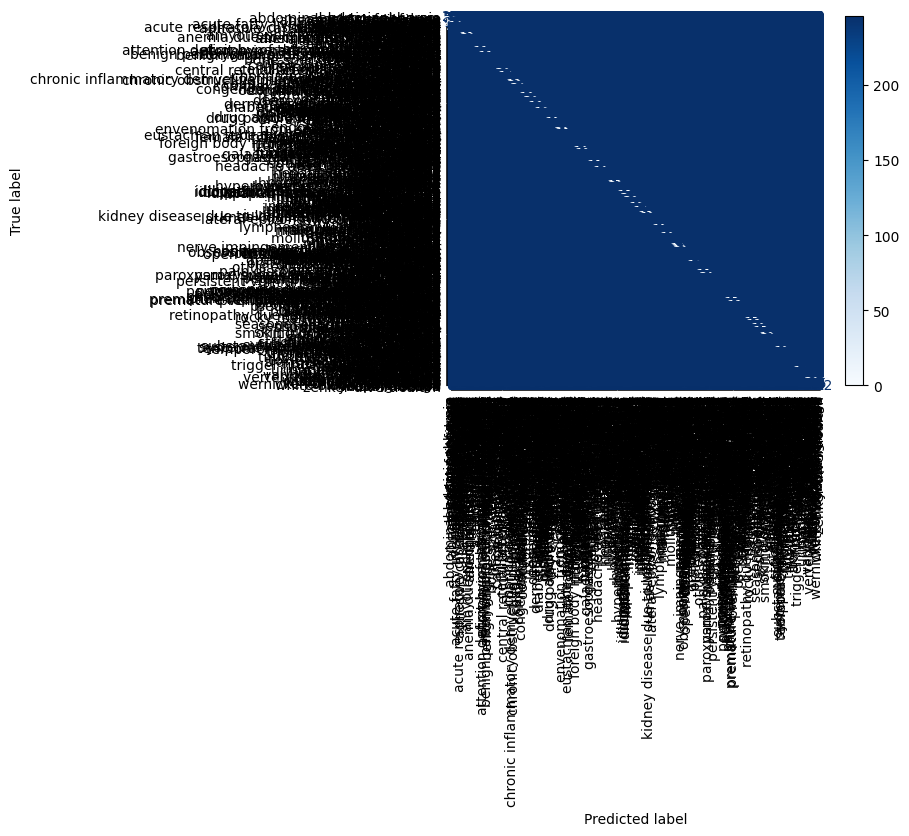

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, xticks_rotation=90, cmap='Blues')

In [37]:
print(classification_report(y_test, y_pred, zero_division=0))

                                                          precision    recall  f1-score   support

                               abdominal aortic aneurysm       0.91      1.00      0.95        20
                                        abdominal hernia       0.89      0.96      0.92        81
                                         abscess of nose       0.74      0.88      0.80        58
                                     abscess of the lung       1.00      1.00      1.00         6
                                  abscess of the pharynx       0.90      0.89      0.90        63
                                    acanthosis nigricans       0.83      0.83      0.83         6
                                               acariasis       1.00      1.00      1.00         5
                                               achalasia       0.63      0.95      0.76        20
                                                    acne       0.69      0.69      0.69       103
                   

In [27]:


os.makedirs("models", exist_ok=True)
model_path = "models/random_forest_disease_prediction_model.pkl"
joblib.dump(model, model_path, compress=3)
joblib.dump(X.columns.tolist(), 'models/symptom_columns.pkl')

['models/symptom_columns.pkl']

In [28]:
import pickle
import gzip
model_path = "models/random_forest_disease_prediction_model.pkl.gz"
with gzip.open(model_path, 'wb') as f:
    # Dump the object using pickle into the gzip-compressed file object
    pickle.dump(model, f)

In [ ]:
import gc
del df, X, y
gc.collect()